In [1]:
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import random as rd

%matplotlib inline

In [2]:
data = pd.read_csv('CCPP.csv', nrows = 200)
points = np.genfromtxt('CCPP.csv', delimiter = ',', skip_header = 1)
print(points)
print(points[:, [0, 4]])
data.head()

[[   14.96    41.76  1024.07    73.17   463.26]
 [   25.18    62.96  1020.04    59.08   444.37]
 [    5.11    39.4   1012.16    92.14   488.56]
 ..., 
 [   31.32    74.33  1012.92    36.48   429.57]
 [   24.48    69.45  1013.86    62.39   435.74]
 [   21.6     62.52  1017.23    67.87   453.28]]
[[  14.96  463.26]
 [  25.18  444.37]
 [   5.11  488.56]
 ..., 
 [  31.32  429.57]
 [  24.48  435.74]
 [  21.6   453.28]]


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


Features:
    1. AT: Temperature (1.81oC - 37.11oC)
    2. V: Exhaust Vacuum (5.36 - 81.5 cm Hg)
    3. AP: Ambient Pressure (992.89 - 1033.30 milibar)
    4. RH: Relative Humidity (25.56% - 100.16%)
Predict the net hourly electrical energy output (PE) of the plant

## Visualize the relationship between features and the output value

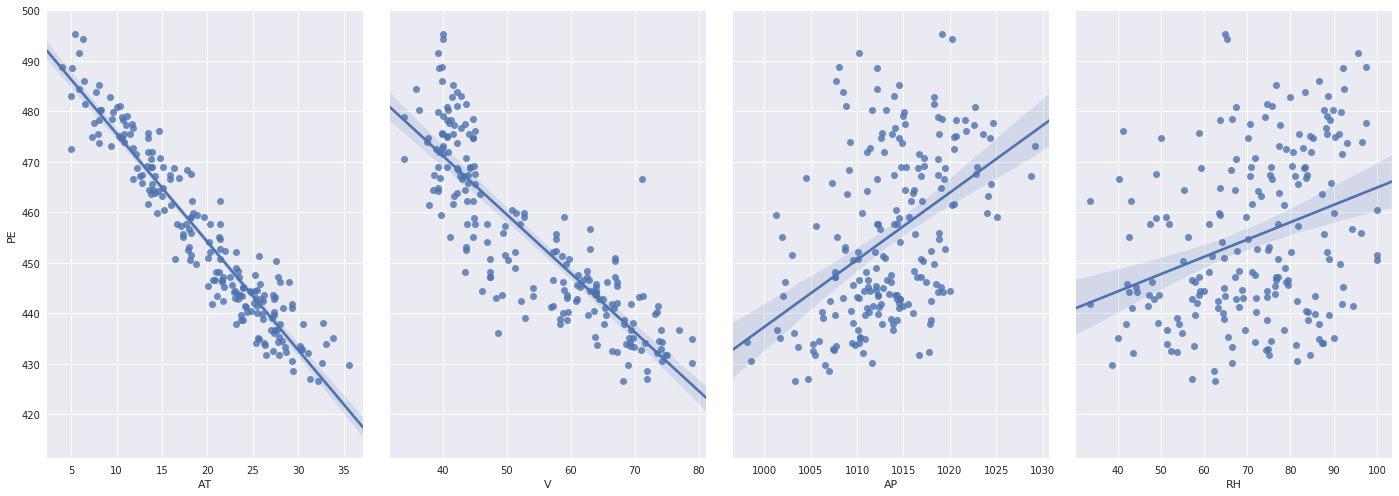

In [3]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['AT','V','AP', 'RH'], y_vars='PE', size=7, aspect=0.7, kind = 'reg')

## Split X and y into training and testing sets

In [4]:
# 70% train, 30% test
train, test = np.split(data.sample(frac=1), [int(.7*len(data))])
#print(train)
#print(test)

## Univariate linear regression

In [5]:
features = ['AT']
# create X and y
X_train = train[features]
y_train = train['PE']

### 1. Scikit-learn

In [6]:
# SCIKIT-LEARN
def univariate_lr_sklearn(X_train, y_train):
    ulr = LinearRegression()
    ulr.fit(X_train, y_train)
    intercept = ulr.intercept_
    slope = ulr.coef_
    return float(slope), float(intercept)

### 2. Closed form

In [7]:
# MANUAL
def univariate_lr_manual(X_trn, y_trn):
    X_train = X_trn['AT'].values.tolist()
    y_train = y_trn.values.tolist()
    sumX = sum(X_train)
    sumY = sum(y_train)
    sumXX = sum([a**2 for a in X_train])
    sumXY = sum([a*b for a, b in zip(X_train, y_train)])
    numerator = sumXY - (1.0/len(X_train)) * sumX * sumY
    denominator = sumXX - (1.0/len(X_train)) * (sumX ** 2)
    slope = numerator / denominator
    intercept = (sumY - slope * sumX) / len(X_train)
    return float(slope), float(intercept)

### 3. Testing

In [8]:
b1_s, b0_s = univariate_lr_sklearn(X_train, y_train)
b1_m, b0_m = univariate_lr_manual(X_train, y_train)

X_train = np.insert(X_train.as_matrix(), 0, 1, axis = 1)
y_train = y_train.as_matrix()

print ('sklearn: y = ' + str(b1_s) + 'AT + ' + str(b0_s))
print ('closed form: y = ' + str(b1_m) + 'AT + ' + str(b0_m))

sklearn: y = -2.146362154134933AT + 496.89625743321557
closed form: y = -2.146362154134902AT + 496.8962574332151


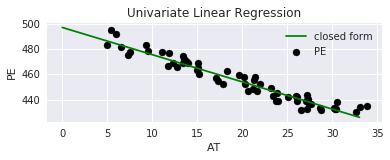

In [9]:
X_test = test[features]
y_test = test.PE

plt.subplot(2, 1, 1)
plt.scatter(X_test, y_test,  color='black')
x = np.r_[0 : 40 : 11]
plt.plot(x, b1_m*x + b0_m, label = 'closed form', color = 'green')
plt.title('Univariate Linear Regression')
plt.xlabel('AT')
plt.ylabel('PE')
plt.legend(loc = 'upper right')

## Bivariate linear regression

In [10]:
features = ['AT', 'V']
# create X and y
X_train = train[features]
y_train = train['PE']

### 1. Scikit-learn

In [11]:
def multivariate_lr_sklearn(X_train, y_train):
    blr = LinearRegression()
    blr.fit(X_train, y_train)
    intercept = blr.intercept_
    coef = blr.coef_
    return np.insert(coef, 0, intercept), blr

### 2. Manual

In [12]:
def multivariate_lr_manual(X_trn, y_trn):
    X = X_trn.as_matrix()
    y = y_trn.as_matrix()
    X = np.insert(X, 0, 1, axis = 1)
    coef = np.dot(np.linalg.pinv(X),y)
    return coef

In [13]:
coef_s, blr = multivariate_lr_sklearn(X_train, y_train)
coef_m = multivariate_lr_manual(X_train, y_train)

num_samples = 100
X_train = np.insert(X_train.as_matrix()[:num_samples,:], 0, 1, axis = 1)
y_train = y_train.as_matrix()[:num_samples]

print ('sklearn: y = ' + str(coef_s[1]) + 'AT + ' + str(coef_s[2]) +  'V + ' + str(coef_s[0]))
print ('closed form: y = ' + str(coef_m[1]) + 'AT + ' + str(coef_m[2]) +  'V + ' + str(coef_m[0]))


sklearn: y = -1.71786315911AT + -0.297303359098V + 504.557467935
closed form: y = -1.71786315911AT + -0.297303359098V + 504.557467935


### 3. Testing

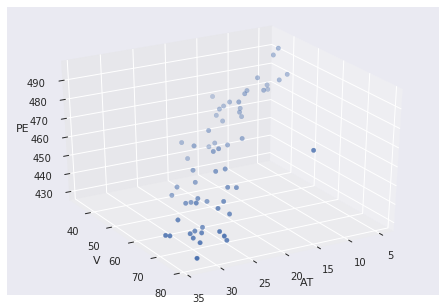

In [14]:
X_test = test[features]
y_test = test.PE
X_AT = X_test['AT'].values.tolist()
X_V = X_test['V'].values.tolist()
y_t = y_test.values.tolist()

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X_AT, X_V, y_t)
ax.set_xlabel('AT')
ax.set_ylabel('V')
ax.set_zlabel('PE')
ax.view_init(azim=60)

plt.show()

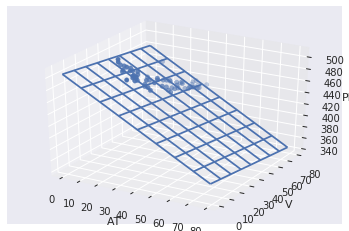

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(0.0, 80, 1)
X, Y = np.meshgrid(x, y)
zs = np.array([coef_m[0]+coef_m[1]*x+coef_m[2]*y for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.scatter(X_AT, X_V, y_t)
ax.set_xlabel('AT')
ax.set_ylabel('V')
ax.set_zlabel('PE')
ax.plot_wireframe(X, Y, Z, rstride = 10, cstride = 10)
ax.view_init(30)
plt.show()

## Multivariate linear regression

### 1. Use all features

In [16]:
features = ['AT', 'V', 'AP', 'RH']
# create X and y
X_train = train[features]
y_train = train['PE']

In [17]:
coef_s, mlr = multivariate_lr_sklearn(X_train, y_train)
coef_m = multivariate_lr_manual(X_train, y_train)
print(coef_s)
print(coef_m)

[  5.54007054e+02  -2.13654395e+00  -1.40818856e-01  -3.61147295e-02
  -1.81359214e-01]
[  5.54007054e+02  -2.13654395e+00  -1.40818856e-01  -3.61147295e-02
  -1.81359214e-01]


AT and V are likely dependent variables because when AT increases, V increases and vice versa. Therefore, removing one of them makes our prediction better

### 2. Remove feature 'AT'

In [18]:
features = ['V', 'AP', 'RH']
# create X and y
X_train = train[features]
y_train = train['PE']

In [19]:
coef_s, mlr = multivariate_lr_sklearn(X_train, y_train)
coef_m = multivariate_lr_manual(X_train, y_train)
print(coef_s)
print(coef_m)
print(list(zip(features, coef_m[1:])))

[-19.57763504  -1.045654     0.51354336   0.1456438 ]
[-19.57763504  -1.045654     0.51354336   0.1456438 ]
[('V', -1.0456539977250305), ('AP', 0.51354336192778682), ('RH', 0.14564380252244891)]


### 3. Remove feature 'V'

In [20]:
features = ['AT', 'AP', 'RH']
# create X and y
X_train = train[features]
y_train = train['PE']

In [21]:
coef_s, mlr = multivariate_lr_sklearn(X_train, y_train)
coef_m = multivariate_lr_manual(X_train, y_train)
print(coef_s)
print(coef_m)

[  5.89763882e+02  -2.38148936e+00  -7.19868757e-02  -2.11955936e-01]
[  5.89763882e+02  -2.38148936e+00  -7.19868757e-02  -2.11955936e-01]


## Multivariate linear regression with categorical attributes

In [22]:
data = pd.read_csv('servo.data', sep=",", header = None)
data.columns = cols = ["motor", "screw", "pgain", "vgain", "class"]
data.head()

,motor,screw,pgain,vgain,class
0,E,E,5,4,0.281251
1,B,D,6,5,0.506252
2,D,D,4,3,0.356251
3,B,A,3,2,5.500033
4,D,B,6,5,0.356251


In [23]:
idxCols = [0, 1, 2, 3]
for i in range(len(idxCols)):
    dummies = pd.get_dummies(data[cols[idxCols[i]]], prefix = cols[idxCols[i]]).iloc[:,1:]
    data = pd.concat([data, dummies], axis = 1)
data.head(9)

,motor,screw,pgain,vgain,class,motor_B,motor_C,motor_D,motor_E,screw_B,screw_C,screw_D,screw_E,pgain_4,pgain_5,pgain_6,vgain_2,vgain_3,vgain_4,vgain_5
0,E,E,5,4,0.281251,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
1,B,D,6,5,0.506252,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
2,D,D,4,3,0.356251,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
3,B,A,3,2,5.500033,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,D,B,6,5,0.356251,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1
5,E,C,4,3,0.806255,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
6,C,A,3,2,5.100014,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
7,A,A,3,2,5.700042,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8,C,A,6,5,0.768754,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


### Find Coefficient

In [24]:
features = ['motor_B', 'motor_C', 'motor_D', 'motor_E',\
            'pgain_4', 'pgain_5', 'pgain_6',\
            'vgain_2','vgain_3', 'vgain_4', 'vgain_5']

# 70% train, 30% test
train, test = np.split(data.sample(frac=1), [int(.7*len(data))])

# create X and y
X_train = train[features]
y_train = train['class']
X_test = test[features]
y_test = test['class']

In [25]:
coef_s, mlr = multivariate_lr_sklearn(X_train, y_train)
coef_m = multivariate_lr_manual(X_train, y_train)
print(coef_s)
print(coef_m)
list(zip(features, coef_m[1:]))

[ 3.27906244  0.09590944 -0.33097363 -1.58741801 -0.60344633 -2.88684923
 -3.17653645 -3.24153912  0.75536555  0.91904067  0.77447406  0.74618785]
[ 3.27906244  0.09590944 -0.33097363 -1.58741801 -0.60344633 -2.88684923
 -3.17653645 -3.24153912  0.75536555  0.91904067  0.77447406  0.74618785]


[('motor_B', 0.095909439212830572),
 ('motor_C', -0.33097363017313525),
 ('motor_D', -1.5874180145118646),
 ('motor_E', -0.6034463329873484),
 ('pgain_4', -2.8868492290900702),
 ('pgain_5', -3.1765364487933194),
 ('pgain_6', -3.2415391206731172),
 ('vgain_2', 0.75536554707829584),
 ('vgain_3', 0.9190406728230297),
 ('vgain_4', 0.7744740586260932),
 ('vgain_5', 0.74618785317686664)]

In [26]:
y_pred = mlr.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


1.13839605713
